# Amazon Customer Reviews - Natural Language Processing
Springboard Data Science Career Track
Capstone 2
by Chantel Clark

## Data
Amazon has an open dataset of over 130 million customer reviews collected between 1995 and 2015, available as URL’s at https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt. Reviews are grouped by product categories such as apparel, automotive, books, e-books, etc. The columns in the dataset include: ‘marketplace’ (country code), ‘customer_id’, ‘review_id’, ‘product_id’, ‘product_parent’ (random identifier for aggregate reviews for the same product), ‘product_title’, ‘product_category’, ‘star_rating’, ‘helpful_votes’, ‘total_votes’, ‘vine’, ‘verified_purchase’, ‘review_headline’, ‘review_body’, ‘review_date’.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import time

In [2]:
# Import sample data from URL
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv'

url_data = pd.read_table(url, sep='\t')
sample = pd.DataFrame(url_data, columns=url_data.keys())
print(sample.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     18778586   RDIJS7QYB6XNR  B00EDBY7X8       122952789   
1          US     24769659  R36ED1U38IELG8  B00D7JFOPC       952062646   
2          US     44331596   R1UE3RPRGCOLD  B002LHA74O       818126353   
3          US     23310293  R298788GS6I901  B00ARPLCGY       261944918   
4          US     38745832    RNX4EXOBBPN5  B00UZOPOFW       717410439   

                                       product_title product_category  \
0                         Monopoly Junior Board Game             Toys   
1  56 Pieces of Wooden Train Track Compatible wit...             Toys   
2         Super Jumbo Playing Cards by S&S Worldwide             Toys   
3           Barbie Doll and Fashions Barbie Gift Set             Toys   
4  Emazing Lights eLite Flow Glow Sticks - Spinni...             Toys   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

In [3]:
type(sample)

pandas.core.frame.DataFrame

In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
marketplace          49 non-null object
customer_id          49 non-null int64
review_id            49 non-null object
product_id           49 non-null object
product_parent       49 non-null int64
product_title        49 non-null object
product_category     49 non-null object
star_rating          49 non-null int64
helpful_votes        49 non-null int64
total_votes          49 non-null int64
vine                 49 non-null object
verified_purchase    49 non-null object
review_headline      49 non-null object
review_body          49 non-null object
review_date          49 non-null object
dtypes: int64(5), object(10)
memory usage: 5.9+ KB


In [5]:
# Import larger data set - Amazon apparel reviews
# Skips 'bad_lines', gets tokenization error without skipping (C error: expected 15 fields, saw 22)
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz'

start = time.time()
url_data = pd.read_table(url, sep='\t', error_bad_lines=False)
url_df = pd.DataFrame(url_data, columns=url_data.keys())
print(url_df.head())
end = time.time()

print('Time to complete: ', (end - start)/60, 'mins')

b'Skipping line 49396: expected 15 fields, saw 22\nSkipping line 57008: expected 15 fields, saw 22\n'
b'Skipping line 82075: expected 15 fields, saw 22\nSkipping line 104435: expected 15 fields, saw 22\nSkipping line 109766: expected 15 fields, saw 22\nSkipping line 124024: expected 15 fields, saw 22\nSkipping line 129914: expected 15 fields, saw 22\nSkipping line 130172: expected 15 fields, saw 22\n'
b'Skipping line 161515: expected 15 fields, saw 22\n'
b'Skipping line 230464: expected 15 fields, saw 22\n'
b'Skipping line 292640: expected 15 fields, saw 22\nSkipping line 293681: expected 15 fields, saw 22\nSkipping line 316511: expected 15 fields, saw 22\nSkipping line 317239: expected 15 fields, saw 22\nSkipping line 326099: expected 15 fields, saw 22\nSkipping line 327595: expected 15 fields, saw 22\n'
b'Skipping line 342645: expected 15 fields, saw 22\nSkipping line 347980: expected 15 fields, saw 22\nSkipping line 376258: expected 15 fields, saw 22\nSkipping line 381192: expected 

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          4.0            0.0          0.0    N

In [6]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881874 entries, 0 to 5881873
Data columns (total 15 columns):
marketplace          object
customer_id          int64
review_id            object
product_id           object
product_parent       int64
product_title        object
product_category     object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtypes: float64(3), int64(2), object(10)
memory usage: 673.1+ MB


There are 5,881,873 reviews in this dataset.

In [7]:
# Convert 'review_date' column to datetime
url_df['review_date'] = pd.to_datetime(url_df['review_date'])

In [8]:
# Date of the oldest review
min(url_df['review_date'])

Timestamp('2000-09-06 00:00:00')

In [9]:
# Date of the newest review
max(url_df['review_date'])

Timestamp('2015-08-31 00:00:00')

## Sample data NLP

### CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
sample.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18778586,RDIJS7QYB6XNR,B00EDBY7X8,122952789,Monopoly Junior Board Game,Toys,5,0,0,N,Y,Five Stars,Excellent!!!,2015-08-31
1,US,24769659,R36ED1U38IELG8,B00D7JFOPC,952062646,56 Pieces of Wooden Train Track Compatible wit...,Toys,5,0,0,N,Y,Good quality track at excellent price,Great quality wooden track (better than some o...,2015-08-31
2,US,44331596,R1UE3RPRGCOLD,B002LHA74O,818126353,Super Jumbo Playing Cards by S&S Worldwide,Toys,2,1,1,N,Y,Two Stars,Cards are not as big as pictured.,2015-08-31
3,US,23310293,R298788GS6I901,B00ARPLCGY,261944918,Barbie Doll and Fashions Barbie Gift Set,Toys,5,0,0,N,Y,my daughter loved it and i liked the price and...,my daughter loved it and i liked the price and...,2015-08-31
4,US,38745832,RNX4EXOBBPN5,B00UZOPOFW,717410439,Emazing Lights eLite Flow Glow Sticks - Spinni...,Toys,1,1,1,N,Y,DONT BUY THESE!,Do not buy these! They break very fast I spun ...,2015-08-31


In [12]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
marketplace          49 non-null object
customer_id          49 non-null int64
review_id            49 non-null object
product_id           49 non-null object
product_parent       49 non-null int64
product_title        49 non-null object
product_category     49 non-null object
star_rating          49 non-null int64
helpful_votes        49 non-null int64
total_votes          49 non-null int64
vine                 49 non-null object
verified_purchase    49 non-null object
review_headline      49 non-null object
review_body          49 non-null object
review_date          49 non-null object
dtypes: int64(5), object(10)
memory usage: 5.9+ KB


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_english = stopwords.words('english')
print(stopwords_english[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Load nltk SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [16]:
import re

# Function to tokenize and stem, citation: 
# adapted from http://brandonrose.org/clustering on April 10, 2020
def tokenize_stem(text):
    # Tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # Filter tokens not containing letters
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [17]:
# Create flat lists vocab_stemmed and vocab_token
vocab_stemmed = []
vocab_token = []
for i in sample.review_body:
    stemmed = tokenize_stem(i) #for each review, tokenize/stem
    vocab_stemmed.extend(stemmed) #extend the 'vocab_stemmed' list
    tokenized = tokenize_only(i)
    vocab_token.extend(tokenized)
    

In [18]:
print(vocab_stemmed[:10])

['excel', 'great', 'qualiti', 'wooden', 'track', 'better', 'than', 'some', 'other', 'we']


In [19]:
print(vocab_token[:10])

['excellent', 'great', 'quality', 'wooden', 'track', 'better', 'than', 'some', 'others', 'we']


In [20]:
vocab_map = pd.DataFrame(zip(vocab_stemmed, vocab_token))
vocab_map.columns = ['Stem','Token']
vocab_map.set_index('Stem', inplace=True)

print(vocab_map.head())

             Token
Stem              
excel    excellent
great        great
qualiti    quality
wooden      wooden
track        track


In [21]:
vocab_map.loc['yorki']

Token    yorkie
Name: yorki, dtype: object

### TFIDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenize_stem)

In [24]:
#tfidf.fit(sample.review_body)

In [25]:
tfidf_matrix = tfidf.fit_transform(sample.review_body)
tfidf_matrix.shape

C:\Users\chant\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(49, 433)

In [26]:
# Extract list of features
features = tfidf.get_feature_names()

print(features[:10])

["'m", "'s", '*disclaim', '6yr', '7-yr', 'abl', 'abov', 'absolout', 'absolut', 'access']


In [27]:
# Inverse document frequency values
#tfidf.idf_
tfidf_matrix

<49x433 sparse matrix of type '<class 'numpy.float64'>'
	with 628 stored elements in Compressed Sparse Row format>

In [28]:
# Create and view TFIDF dataframe
dense_matrix = tfidf_matrix.todense()
df = pd.DataFrame(dense_matrix, 
                 columns=tfidf.get_feature_names())
df.head()

,'m,'s,*disclaim,6yr,7-yr,abl,abov,absolout,absolut,access,...,work/snap,worth,wow,wrong,yard,year,yoga,yorki,yrs,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine similarity - sample

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(df, df)
print(cosine_matrix)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.15598708 0.         0.        ]
 ...
 [0.         0.         0.15598708 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [30]:
type(cosine_matrix)

numpy.ndarray

In [31]:
# Find the n highest values and their indices for cosine similarity
n = 5
test_ind = 2

test = cosine_matrix[test_ind]
# Indices
temp = np.argpartition(-test, n)
result_args = temp[:n]
print('Indices:', result_args) # indices of highest values
# Cosine similarity
temp = np.partition(-test, n)
result = -temp[:4]
print('Cosine similarity:', result) # highest values

    

Indices: [ 5 42  2 39 46]
Cosine similarity: [0.34884417 0.2592253  1.         0.2592253 ]


In [32]:
# Print out test review, and most similar reviews
print(sample.iloc[test_ind].review_body)

for ind in result_args:
    if ind != test_ind:
        print(sample.iloc[ind].review_body)

Cards are not as big as pictured.
Great item. Pictures pop thru and add detail as &#34;painted.&#34;  Pictures dry and it can be repainted.
My Grandson loves these cards.  Thank you
My Grandson loves these cards.  Thank you
Absolutely one of the best traps in the game. It is never a dead and always live since you can always pay half your lifepoints for its cost. It's main power is that it can stop any card. Hopefully this card comes off the Forbidden/Limited list soon.


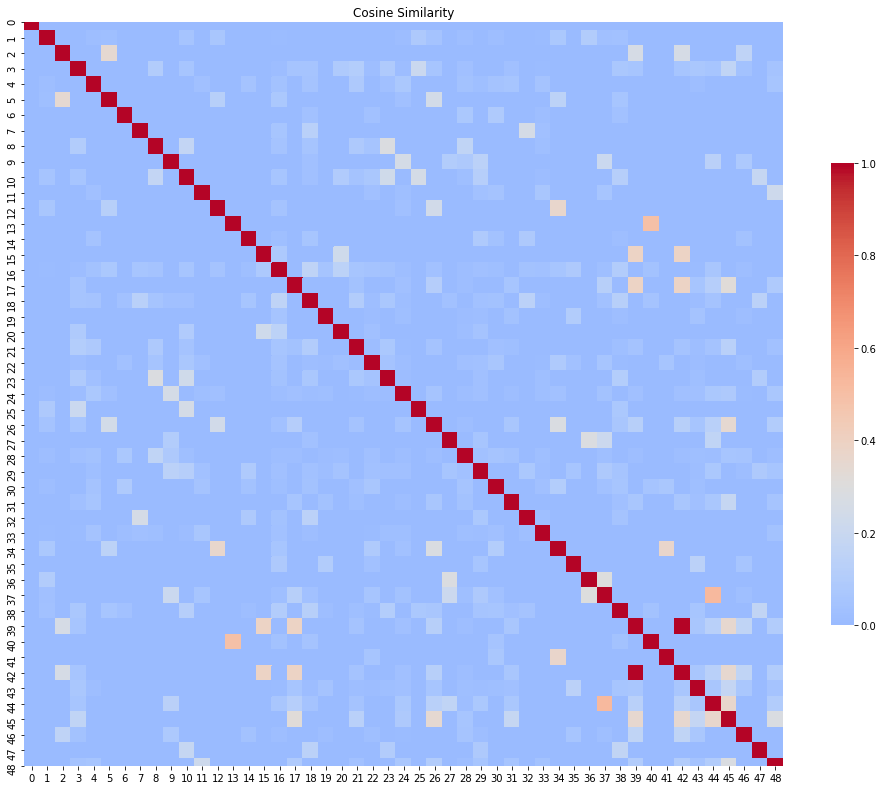

In [33]:
import seaborn as sns
# Seaborn heatmap

def get_heatmap(matrix):
    plt.figure(figsize=(17,17))
    ax = sns.heatmap(
        matrix, 
        vmin=0.0, vmax=1, center=0.3,
        cmap='coolwarm',
        square=True,
        robust=True,
        annot_kws={"size":10},
        cbar_kws={"shrink": 0.5}
    )
    plt.title('Cosine Similarity')
    
get_heatmap(cosine_matrix)

In [34]:
print(sample.iloc[37].review_body)
print(sample.iloc[39].review_body)
print(sample.iloc[42].review_body)

I ordered these for my 3 year old son's birthday party as party favors. They were a huge hit & the perfect fit for a 3 year old!
My Grandson loves these cards.  Thank you


## Apparel Dataset

In [35]:
len(url_df)

5881874

In [36]:
# Remove the reviews that have no review_body
reviews = url_df.review_body.dropna(axis=0)
len(reviews)

5881089

In [37]:
# Number of reviews with no review body
len(url_df) - len(reviews)

785

In [38]:
reviews.head()

0    These Really Do Work Great, But You Do Need To...
1    I love this dress. Absolute favorite for winte...
2    Nice socks, great colors, just enough support ...
3    I bought this for my husband and WOW, this is ...
4    Perfect dress and the customer service was awe...
Name: review_body, dtype: object

In [39]:
# *** TIME *** 1.6 hours
# Create tfidf matrix, each row is a review with weighted value for each word within the review

# Instantiate tfidf vector
tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenize_stem)

start = time.time()
tfidf_matrix = tfidf.fit_transform(reviews)
end = time.time()

print('Time to fit and transform:', (end-start)/3600, 'hours')
print(tfidf_matrix.shape)

C:\Users\chant\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Time to fit and transform: 1.6495755559868284 hours
(5881089, 510428)


In [ ]:
# Create and view TFIDF dataframe
start=time.time()
#dense_matrix = tfidf_matrix.todense()
df = pd.DataFrame(tfidf_matrix)
                 #=tfidf.get_feature_names())
end=time.time()
df.head()
print('Time:', (end-start)/60, 'mins')

In [ ]:
%%time
# *** TIME ***
# Compute the cosine similarity between all reviews
start = time.time()
cosine_matrix = cosine_similarity(df, df)
#cosine_matrix = cosine_similarity(tfidf_matrix,tfidf_matrix)
end = time.time()

print(cosine_matrix)
print('Time:', (end-start)/3600, 'hours')

In [ ]:
# Print out a heatmap of cosine similarity
start=time.time()
get_heatmap(cosine_matrix)
end=time.time()
print('Time:', (end-start)/366000, 'mins')

In [ ]:
# Find the n highest values and their indices for cosine similarity
n = 5
test_ind = 2

test = cosine_matrix[test_ind]
# Indices
temp = np.argpartition(-test, n)
result_args = temp[:n]
print('Indices:', result_args) # indices of highest values
# Cosine similarity
temp = np.partition(-test, n)
result = -temp[:4]
print('Cosine similarity:', result) # highest values

# Print out test review, and most similar reviews
print(sample.iloc[test_ind].review_body)

for ind in result_args:
    if ind != test_ind:
        print(sample.iloc[ind].review_body)